# Multiple Linear Regression

### Objectives
After completing this lab, you will be able to:
- Use scikit-learn to implement multiple linear regression
- Create, train, and test a multiple linear regression model on real data

# Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Load the data 

In [2]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [3]:
df = pd.read_csv(url)
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
646,2014,LAND ROVER,RANGE ROVER SPORT V8 5.0 SC,SUV - STANDARD,5.0,8,AS8,Z,17.3,12.2,15.0,19,345
606,2014,KIA,FORTE 5,FULL-SIZE,1.6,4,M6,X,11.1,8.2,9.8,29,225
322,2014,DODGE,DART TURBO AERO,MID-SIZE,1.4,4,M6,X,8.5,5.8,7.3,39,168
1016,2014,VOLKSWAGEN,BEETLE,COMPACT,2.0,4,A6,Z,10.3,7.7,9.1,31,209
324,2014,DODGE,DURANGO AWD FFV,SUV - STANDARD,3.6,6,A8,X,13.9,9.8,12.1,23,278


### FuelConsumption.csv:
##### You will download and use a fuel consumption dataset, FuelConsumption.csv, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. Dataset source

- MODEL YEAR e.g. 2014
- MAKE e.g. VOLVO
- MODEL e.g. S60 AWD
- VEHICLE CLASS e.g. COMPACT
- ENGINE SIZE e.g. 3.0
- CYLINDERS e.g 6
- TRANSMISSION e.g. AS6
- FUEL TYPE e.g. Z
- FUEL CONSUMPTION in CITY(L/100 km) e.g. 13.2
- FUEL CONSUMPTION in HWY (L/100 km) e.g. 9.5
- FUEL CONSUMPTION COMBINED (L/100 km) e.g. 11.5
- FUEL CONSUMPTION COMBINED MPG (MPG) e.g. 25
- CO2 EMISSIONS (g/km) e.g. 182
#### Your task will be to create a multiple linear regression model using some of these features to predict CO2 emissions of unobserved cars based on the selected features.

# Explore and select features

In [4]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Notice that some of the variables are not included in the description. This is because they aren't numerical. In practice, you would analyze these features if required to improve the accuracy of your model. In the interest of time, you can omit this step here.

Notice also that MODELYEAR is the same for all cars, so you can drop these variables for this modeling illustration.

In [5]:
# Drop categoricals and any unseless columns
df = df.drop(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE',],axis=1)

Now that you have eliminated some features, take a look at the relationships among the remaining features.

Analyzing a correlation matrix that displays the pairwise correlations between all features indicates the level of independence between them.

It also indicates how predictive each feature is of the target.

You want to eliminate any strong dependencies or correlations between features by selecting the best one from each correlated group.

In [8]:
df.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


Look at the bottom row, which shows the correlation between each variable and the target, 'CO2EMISSIONS'. Each of these shows a fairly high level of correlation, each exceeding 85% in magnitude. Thus all of these features are good candidates.

Next, examine the correlations of the distinct pairs. 'ENGINESIZE' and 'CYLINDERS' are highly correlated, but 'ENGINESIZE' is more correlated with the target, so we can drop 'CYLINDERS'.

Similarly, each of the four fuel economy variables is highly correlated with each other. Since FUELCONSUMPTION_COMB_MPG is the most correlated with the target, you can drop the others: 'FUELCONSUMPTION_CITY,' 'FUELCONSUMPTION_HWY,' 'FUELCONSUMPTION_COMB.'

Notice that FUELCONSUMPTION_COMB and FUELCONSUMPTION_COMB_MPG are not perfectly correlated. They should be, though, because they measure the same property in different units. In practice, you would investigate why this is the case. You might find out that some or all of the data is not useable as is.

In [9]:
df = df.drop(['CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB',],axis=1)

In [10]:
df.head()

,ENGINESIZE,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,33,196
1,2.4,29,221
2,1.5,48,136
3,3.5,25,255
4,3.5,27,244


To help with selecting predictive features that are not redundant, consider the following scatter matrix, which shows the scatter plots for each pair of input features. The diagonal of the matrix shows each feature's histogram.

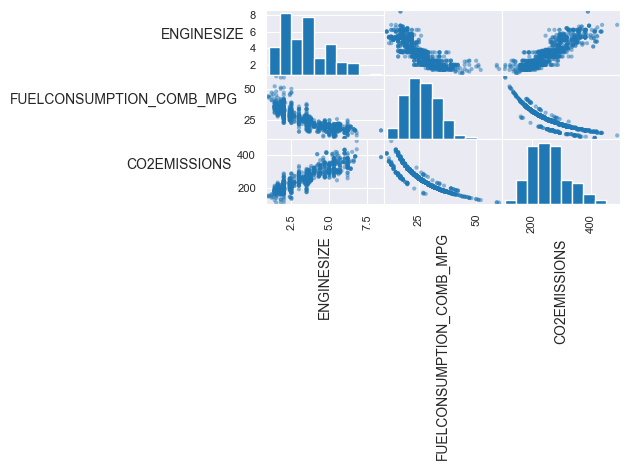

In [12]:
axes = pd.plotting.scatter_matrix(df, alpha=0.5)
# need to rotate axis labels so we can read them
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()